In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from time import time

from scipy import ndimage
from sklearn import datasets, manifold
from sklearn.datasets.samples_generator import make_blobs

from sklearn import metrics

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import (
    KMeans, DBSCAN,
    AgglomerativeClustering
)

%matplotlib inline

## KMeans

In [2]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

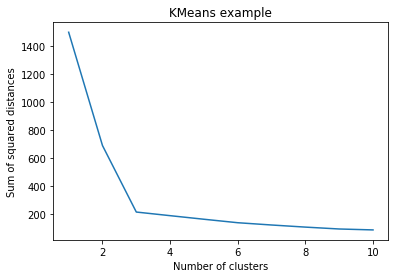

In [3]:
squared_distances_sum = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    squared_distances_sum.append(kmeans.inertia_)

plt.plot(range(1, 11), squared_distances_sum)
plt.title("KMeans example")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distances")
plt.show()

In [4]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [5]:
kmeans.cluster_centers_

array([[-1.30266211, -0.65704205],
       [ 0.62260555,  1.3172598 ],
       [ 0.6954587 , -0.64442334]])

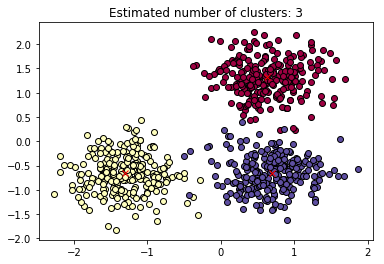

In [6]:
core_samples_mask = np.zeros_like(kmeans.labels_, dtype=bool)
# core_samples_mask[kmeans.core_sample_indices_] = True

unique_labels = set(y_kmeans)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col),
             markeredgecolor="k", markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col),
             markeredgecolor="k", markersize=6)

plt.plot(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:,1],
    "o", marker="x",
    c="red", label="Centroids"
)

    
plt.title("Estimated number of clusters: {}".format(3))
plt.show()

## DBSCAN

Estimated number of clusters: 3
Estimated number of noise points: 18
Silhouette Coefficient: 0.6255247640253795


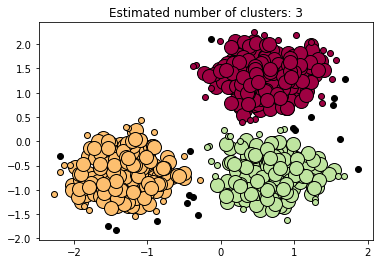

In [13]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: {}".format(n_clusters_))
print("Estimated number of noise points: {}".format(n_noise_))

print("Silhouette Coefficient: {}".format(metrics.silhouette_score(X, labels)))

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col),
             markeredgecolor="k", markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col),
             markeredgecolor="k", markersize=6)

plt.title("Estimated number of clusters: {}".format(n_clusters_))
plt.show()

## Agglomerative Clusterization

Взял отсюда: https://scikit-learn.org/stable/auto_examples/cluster/plot_digits_linkage.html#sphx-glr-auto-examples-cluster-plot-digits-linkage-py

Computing embedding
Done.
ward :	0.51s
average :	0.36s
complete :	0.37s


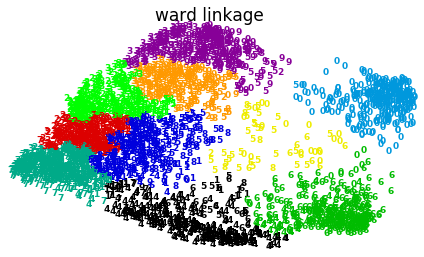

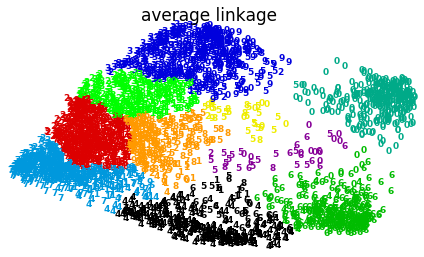

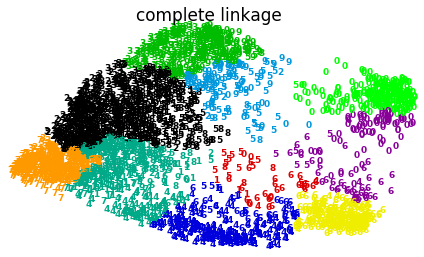

In [14]:
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

np.random.seed(0)

def nudge_images(X, y):
    shift = lambda x: ndimage.shift(x.reshape((8, 8)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y


X, y = nudge_images(X, y)


def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)

plt.show()